Step 0: preperation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


%matplotlib inline

df = pd.read_csv('./survey_results_public.csv') #2019 survey data from Stackoverflow
df.head(20)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
7,8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or mor

In [108]:
pd.set_option('display.max_rows', 3000)

checks

In [45]:
df_subset.columns

Index(['Hobbyist', 'OpenSourcer', 'Employment', 'EdLevel', 'YearsCode',
       'ConvertedComp', 'Age', 'Gender'],
      dtype='object')

In [6]:
#only choosing the columns relevant to our business question
df_subset=df[['Hobbyist', 'OpenSourcer','Employment','EdLevel', 'YearsCode', 'ConvertedComp', 'Age', 'Gender']]
print(df_subset)

      Hobbyist                                        OpenSourcer  \
0          Yes                                              Never   
1           No                            Less than once per year   
2          Yes                                              Never   
3           No                                              Never   
4          Yes                         Once a month or more often   
...        ...                                                ...   
88878      Yes  Less than once a month but more than once per ...   
88879       No                                              Never   
88880       No                                              Never   
88881       No                                              Never   
88882      Yes                            Less than once per year   

                                              Employment  \
0                 Not employed, and not looking for work   
1                     Not employed, but looking for

Step 1: data cleaning

we would not like to include missing values that are hard to anticipate/guess
anticipatable columns: 
opensourcer - missing means no
education - missing means no higher education
hobbist - missing means not a hobbist
employment - missing means unemployed
yearscode - missing means 0 years of coding

the other columns (Age, Gender, Salary), however, are hard to anticipate. 
Moreoever we do not want to distort the data by artificially introducing mode/mean imputation,
especially we have modelling later

Most importantly even with the dropping of rows with missing value, the data set size is still big enough (>50,000)

In [7]:
df_subset_clean = df_subset.dropna(subset=['ConvertedComp', 'Age', 'Gender'], how='any')
print (df_subset_clean)

      Hobbyist                                        OpenSourcer  \
2          Yes                                              Never   
3           No                                              Never   
5          Yes                                              Never   
8          Yes                         Once a month or more often   
12         Yes  Less than once a month but more than once per ...   
...        ...                                                ...   
88324      Yes                            Less than once per year   
88325      Yes                            Less than once per year   
88326      Yes                                              Never   
88328      Yes                         Once a month or more often   
88330      Yes                         Once a month or more often   

               Employment                                            EdLevel  \
2      Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
3      Empl

check

In [80]:
df_subset_clean.columns
np.count_nonzero(df_subset_clean.isnull())
#924 rows with some missing value (out of 52970 rows) - these will be resolved after step2

924

Step 2: convert and cleaning multiple categorical variables, preparing for histogram plottings

In [8]:
#cleaning Education Level categorical variable

def higher_ed(EdLevel):

       '''
    INPUT
   EdLevel, education level response from survey which includes around 10 different categories such as Master's degree
    
    OUTPUT
   A binary variable - 1 for higher education recevied (B.A. and above + Professional Degree), 0 for no higher education
 
     Note that missing values are imputated as 0 (no higher education)

    '''
    
    if EdLevel in ("Master's degree", "Bachelor’s degree (BA, BS, B.Eng., etc.)", "Professional degree", "Other doctoral degree (Ph.D, Ed.D., etc.)"):
        return 1
    else:
        return 0
    

binaryed=df_subset_clean["EdLevel"].apply(higher_ed) #Test function to assure it provides 1 and 0 values for the df

print(binaryed)


2        1
3        1
5        1
8        0
12       0
        ..
88324    1
88325    1
88326    0
88328    0
88330    1
Name: EdLevel, Length: 52970, dtype: int64


In [9]:
#cleaning OpenSourcer response - either yes or no

def Open_Sourcer(OpenSourcer):

           '''
    INPUT
   OpenSourcer, whether the survey taker contributes to Open Source,
   this includes freqency of contribution and therefore a few different categories
    
    OUTPUT
   A binary variable - 1 as long as there is some contribution to Open Source, 0 for never any contribution
 
     Note that missing values are imputated as 0 (no contribution)

    '''
    
    
    if OpenSourcer in ("Never"):
        return 0
    else:
        return 1
    

binaryopen=df_subset_clean["OpenSourcer"].apply(Open_Sourcer) #Test function to assure it provides 1 and 0 values for the df

print(binaryopen)

2        0
3        0
5        0
8        1
12       1
        ..
88324    1
88325    1
88326    0
88328    1
88330    1
Name: OpenSourcer, Length: 52970, dtype: int64


In [10]:
##converting gender variable - 1 for man 0 for woman
def Gender_binary(Gender):

               '''
    INPUT
   Gender,  whether the survey taker is male of female (categorical words strings)
    
    OUTPUT
   A binary variable - 1 for Men and 0 for Women - rationale is so that we can take this a a dummy variable in regression later
 
     No missing value

    '''
    
    if Gender in ("Woman"):
        return 0
    else:
        return 1
    

binarygender=df_subset_clean["Gender"].apply(Gender_binary) #Test function to assure it provides 1 and 0 values for the df

print(binarygender)

2        1
3        1
5        1
8        1
12       1
        ..
88324    1
88325    1
88326    1
88328    1
88330    1
Name: Gender, Length: 52970, dtype: int64


In [11]:
##converting employment variable - 1 for employed full time or part time, 0 for unemployed or retired
def Employment_binary(Employment):
           '''
    INPUT
   Employment, employment status that include a few categories such as full time or part time employed
    
    OUTPUT
   A binary variable - 1 as long as person is employed, 0 for not employed at all or retired
 
     Note that missing values are imputated as 0 (not employed)

    '''
    
    if Employment in ("Employed full-time", "Independent contractor, freelancer, or self-employed", "Employed part-time"):
        return 1
    else:
        return 0
    

binaryemp=df_subset_clean["Employment"].apply(Employment_binary) #Test function to assure it provides 1 and 0 values for the df

df_subset_clean["Employment"].apply(Employment_binary)[:3000]

2       1
3       1
5       1
8       1
12      1
       ..
5001    1
5002    1
5007    1
5008    1
5009    1
Name: Employment, Length: 3000, dtype: int64

In [12]:
##converting hobbyist variable - 1 for yes, else 0
def Hobbyist_binary(Hobbyist):

                   '''
    INPUT
   Hobbyist,  whether the survey taker is code as a hobby (categorical words strings)
    
    OUTPUT
   A binary variable - 1 for yes and 0 for no - rationale is so that we can take this a a dummy variable in regression later
 
     Note that missing values are imputed as 0 (no hobby)

    '''
    
    if Hobbyist in ("Yes"):
        return 1
    else:
        return 0
    

binaryhobby=df_subset_clean["Hobbyist"].apply(Hobbyist_binary) #Test function to assure it provides 1 and 0 values for the df
df_subset_clean["Hobbyist"].apply(Hobbyist_binary)[:3000]


2       1
3       0
5       1
8       1
12      1
       ..
5001    0
5002    1
5007    1
5008    1
5009    1
Name: Hobbyist, Length: 3000, dtype: int64

In [116]:
##cleaning years of coding - null to 0, and less than 1 year to 1, more than 50 years to 50




nonullyear1=df_subset_clean["YearsCode"].replace("Less than 1 year", 1)

nonullyear=nonullyear1.replace("More than 50 years", 50)

cleanyear=pd.to_numeric(nonullyear.fillna("0")).astype(int)

print(cleanyear)



2         3
3         3
5        13
8        12
12       17
         ..
88324    31
88325    12
88326    17
88328    18
88330     9
Name: YearsCode, Length: 52970, dtype: int32


In [92]:
#putting age into categories so that we can plot histograms

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
age_group=pd.cut(df_subset_clean['Age'], bins, labels = labels,include_lowest = True)
print (age_group)

2        18-29
3        18-29
5        18-29
8        18-29
12       18-29
         ...  
88324    40-49
88325    18-29
88326    30-39
88328    30-39
88330    30-39
Name: Age, Length: 52970, dtype: category
Categories (6, object): [18-29 < 30-39 < 40-49 < 50-59 < 60-69 < 70+]


In [134]:
#putting yearscode into categories so that we can plot histograms
bins = [0, 3, 5, 10, 20, 60]
labels = ['<3','3-5', '5-10', '10-20', '20+']
yearscode_group=pd.cut(cleanyear, bins, labels = labels,include_lowest = True)
print (yearscode_group)

2           <3
3           <3
5        10-20
8        10-20
12       10-20
         ...  
88324      20+
88325    10-20
88326    10-20
88328    10-20
88330     5-10
Name: YearsCode, Length: 52970, dtype: category
Categories (5, object): [<3 < 3-5 < 5-10 < 10-20 < 20+]


In [130]:
#putting salary into categories so that we can plot histograms

bins = [0,30000, 50000, 100000, 200000, 60000000]
labels = ['<30k','$30-50k', '$50-100k', '$100-200k', '$200k+']
salary_group=pd.cut(df_subset_clean['ConvertedComp'], bins, labels = labels,include_lowest = True)
print (salary_group)


2             <30k
3         $50-100k
5           $200k+
8         $50-100k
12        $50-100k
           ...    
88324       $200k+
88325    $100-200k
88326     $50-100k
88328     $50-100k
88330         <30k
Name: ConvertedComp, Length: 52970, dtype: category
Categories (5, object): [<30k < $30-50k < $50-100k < $100-200k < $200k+]


Step 3: tidying up and presenting a final data set

In [135]:
#combining all columns together


df_subset_final=pd.concat([salary_group, age_group, yearscode_group, binaryemp,binarygender,binaryed, binaryhobby,binaryopen], axis=1)

print(df_subset_final)


      ConvertedComp    Age YearsCode  Employment  Gender  EdLevel  Hobbyist  \
2              <30k  18-29        <3           1       1        1         1   
3          $50-100k  18-29        <3           1       1        1         0   
5            $200k+  18-29     10-20           1       1        1         1   
8          $50-100k  18-29     10-20           1       1        0         1   
12         $50-100k  18-29     10-20           1       1        0         1   
...             ...    ...       ...         ...     ...      ...       ...   
88324        $200k+  40-49       20+           1       1        1         1   
88325     $100-200k  18-29     10-20           1       1        1         1   
88326      $50-100k  30-39     10-20           1       1        0         1   
88328      $50-100k  30-39     10-20           1       1        0         1   
88330          <30k  30-39      5-10           1       1        1         1   

       OpenSourcer  
2                0  
3        

In [81]:
#check
df_subset_final.columns
np.count_nonzero(df_subset_final.isnull())
#0 rows with some missing value - exactly spot on what we want

0

Step 4: plotting various histograms for Single Factor Profiling

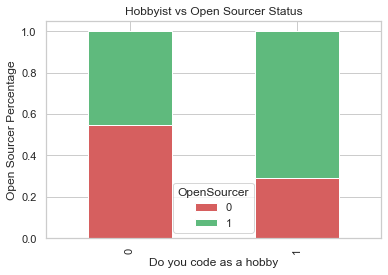

In [88]:
hobby_table=pd.crosstab(df_subset_final.Hobbyist,df_subset_final.OpenSourcer)
hobby_table.div(hobby_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,color=['#d65f5f', '#5fba7d'])
plt.title('Hobbyist vs Open Sourcer Status')
plt.xlabel('Do you code as a hobby')
plt.ylabel('Open Sourcer Percentage')
plt.savefig('hobby')


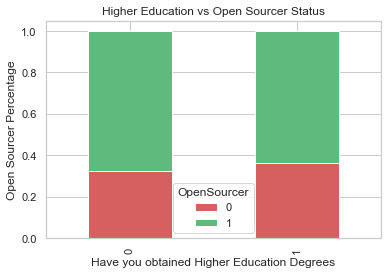

In [87]:
ed_table=pd.crosstab(df_subset_final.EdLevel,df_subset_final.OpenSourcer)
ed_table.div(ed_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,color=['#d65f5f', '#5fba7d'])
plt.title('Higher Education vs Open Sourcer Status')
plt.xlabel('Have you obtained Higher Education Degrees')
plt.ylabel('Open Sourcer Percentage')
plt.savefig('ed')

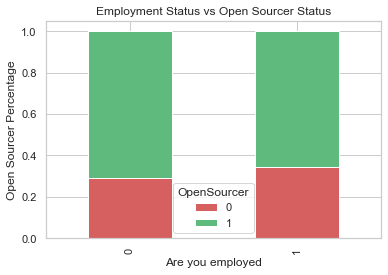

In [89]:
emp_table=pd.crosstab(df_subset_final.Employment,df_subset_final.OpenSourcer)
emp_table.div(emp_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,color=['#d65f5f', '#5fba7d'])
plt.title('Employment Status vs Open Sourcer Status')
plt.xlabel('Are you employed')
plt.ylabel('Open Sourcer Percentage')
plt.savefig('emp')

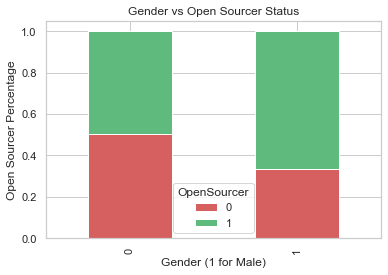

In [90]:
gender_table=pd.crosstab(df_subset_final.Gender,df_subset_final.OpenSourcer)
gender_table.div(gender_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,color=['#d65f5f', '#5fba7d'])
plt.title('Gender vs Open Sourcer Status')
plt.xlabel('Gender (1 for Male)')
plt.ylabel('Open Sourcer Percentage')
plt.savefig('gender')

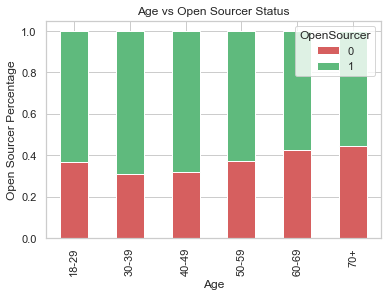

In [95]:
age_table=pd.crosstab(df_subset_final.Age,df_subset_final.OpenSourcer)
age_table.div(age_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,color=['#d65f5f', '#5fba7d'])
plt.title('Age vs Open Sourcer Status')
plt.xlabel('Age')
plt.ylabel('Open Sourcer Percentage')
plt.savefig('age')


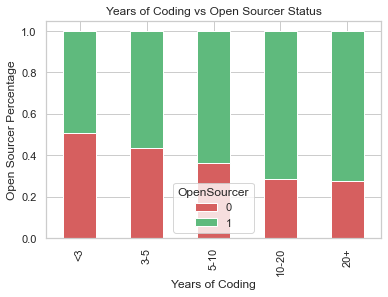

In [136]:
year_table=pd.crosstab(df_subset_final.YearsCode,df_subset_final.OpenSourcer)
year_table.div(year_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,color=['#d65f5f', '#5fba7d'])
plt.title('Years of Coding vs Open Sourcer Status')
plt.xlabel('Years of Coding')
plt.ylabel('Open Sourcer Percentage')
plt.savefig('years')


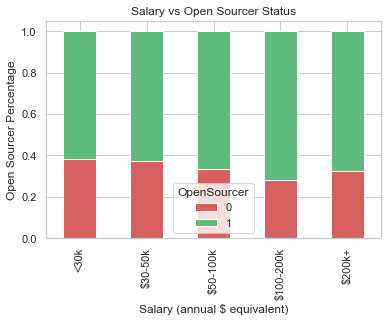

In [137]:
salary_table=pd.crosstab(df_subset_final.ConvertedComp,df_subset_final.OpenSourcer)
salary_table.div(salary_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,color=['#d65f5f', '#5fba7d'])
plt.title('Salary vs Open Sourcer Status')
plt.xlabel('Salary (annual $ equivalent)')
plt.ylabel('Open Sourcer Percentage')
plt.savefig('Salary')


Step 5: we'll perform a logistic regression to determin statistical signicifcance of the explored variables above with likelihood of being an open sourcer

In [103]:
# data: similar to before, but converting age_group back to age raw data
df_subset_model=pd.concat([df_subset_clean[['ConvertedComp','Age']], cleanyear, binaryemp,binarygender,binaryed, binaryhobby,binaryopen], axis=1)

print(df_subset_model)
df_subset_model.columns
#good result - age is back

       ConvertedComp   Age YearsCode  Employment  Gender  EdLevel  Hobbyist  \
2             8820.0  28.0         3           1       1        1         1   
3            61000.0  22.0         3           1       1        1         0   
5           366420.0  28.0        13           1       1        1         1   
8            95179.0  23.0        12           1       1        0         1   
12           90000.0  28.0        17           1       1        0         1   
...              ...   ...       ...         ...     ...      ...       ...   
88324      2000000.0  48.0        31           1       1        1         1   
88325       130000.0  26.0        12           1       1        1         1   
88326        82488.0  34.0        17           1       1        0         1   
88328        68745.0  37.0        18           1       1        0         1   
88330        22915.0  33.0         9           1       1        1         1   

       OpenSourcer  
2                0  
3        

Index(['ConvertedComp', 'Age', 'YearsCode', 'Employment', 'Gender', 'EdLevel',
       'Hobbyist', 'OpenSourcer'],
      dtype='object')

In [106]:
# running of model
X = df_subset_model[['ConvertedComp', 'Age', 'YearsCode', 'Employment', 'Gender', 'EdLevel','Hobbyist']]
y = df_subset_model[['OpenSourcer']]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

logit_model = LogisticRegression() # Instantiate
logit_model.fit(X_train, y_train) #Fit


        
#Predict and score the model
y_test_preds = logit_model.predict(X_test) 

score = logit_model.score(X_test, y_test)
print(score)
print(logit_model.coef_)

0.6580454345226858
[[4.08623657e-08 1.65009688e-02 8.33679504e-03 5.11589210e-04
  5.23339438e-04 2.20712264e-04 5.79733666e-04]]


C:\Users\Hefu Wang\miniconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
